In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tabulate

In [ ]:
pip install scikit-learn matplotlib


In [ ]:
pip install pandas numpy scikit-learn


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


**PREPROCESSING**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning
# You might need to perform tasks like handling missing values or removing duplicates if necessary.

# Feature Engineering
# Depending on your specific goals, you may want to engineer new features or select relevant ones.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Example: Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print ("Done")
# Save the preprocessed dataset if needed
# df.to_csv("preprocessed_UNSW_NB15_testing-set.csv", index=False)

# Now, you can use df for your machine learning tasks.


Done


**Feature Extraction**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the dataset
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning and Label Encoding (if necessary)
# You might need to perform tasks like handling missing values or removing duplicates if necessary.
# Also, encode categorical features if present.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert the target variable to binary (0 or 1)
threshold = 0.5  # Adjust the threshold as needed
df['label'] = (df['label'] > threshold).astype(int)

# Dimensionality Reduction using PCA
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols]))
df_pca.columns = [f"PCA_{i+1}" for i in range(n_components)]

# Correlation-based Feature Selection
# Select the top k features based on mutual information with the binary target variable
k = 5  # Adjust the number of features as needed
X = df_pca  # Use the PCA-transformed features as input
y = df['label']

# Use mutual_info_classif for feature selection
best_features = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = best_features.fit_transform(X, y)
selected_features = X.columns[best_features.get_support()]

# Now, 'selected_features' contains the names of the top k features selected based on mutual information.

# You can proceed to train your botnet detection model using the selected features.
print('Done')

Done


**PCA**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning and Label Encoding (if necessary)
# You might need to perform tasks like handling missing values or removing duplicates if necessary.
# Also, encode categorical features if present.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Impute missing values using IterativeImputer
imputer = IterativeImputer()
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# PCA Feature Extraction
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols]))
df_pca.columns = [f"PCA_{i+1}" for i in range(n_components)]

# Now, 'df_pca' contains the extracted PCA features.

# You can proceed to train your botnet detection model using the PCA features or perform additional feature selection as needed.


**RANDOMFOREST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

# Load the dataset and preprocess as needed
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning and Label Encoding (if necessary)
# You might need to perform tasks like handling missing values or removing duplicates if necessary.
# Also, encode categorical features if present.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert the 'label' column to binary categorical (0 or 1)
threshold = 0.5  # Adjust the threshold as needed
df['label'] = (df['label'] > threshold).astype(int)

# PCA Feature Extraction
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols]))
df_pca.columns = [f"PCA_{i+1}" for i in range(n_components)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['label'], test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_model = RandomForestClassifier()  # Initialize Random Forest classifier
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Accuracy: 0.99
Precision: 0.99


**ROC CURVE**

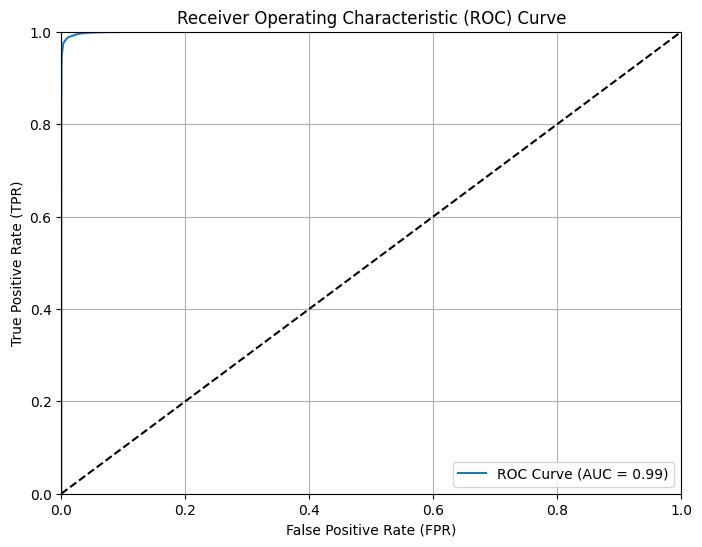

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset and preprocess as needed
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning and Label Encoding (if necessary)
# You might need to perform tasks like handling missing values or removing duplicates if necessary.
# Also, encode categorical features if present.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert the 'label' column to binary categorical (0 or 1)
threshold = 0.5  # Adjust the threshold as needed
df['label'] = (df['label'] > threshold).astype(int)

# PCA Feature Extraction
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols]))
df_pca.columns = [f"PCA_{i+1}" for i in range(n_components)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['label'], test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**CONFUSION MATRIX**

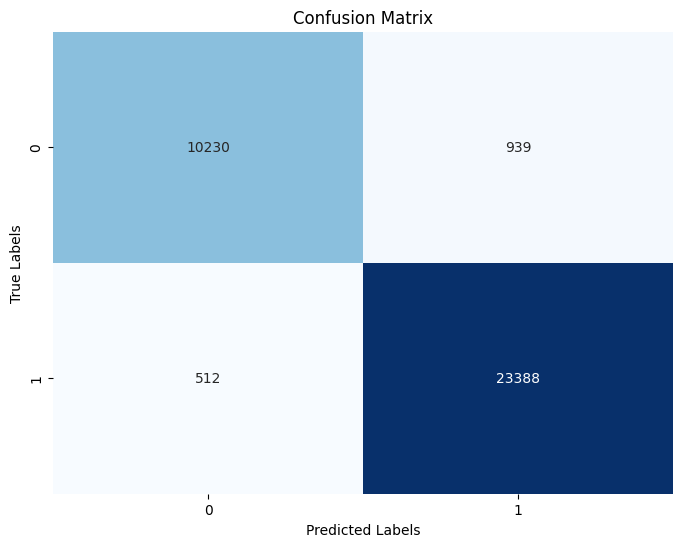

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11169
           1       0.96      0.98      0.97     23900

    accuracy                           0.96     35069
   macro avg       0.96      0.95      0.95     35069
weighted avg       0.96      0.96      0.96     35069



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv")

# Drop unnecessary columns (e.g., 'id', 'attack_cat')
data.drop(['id', 'attack_cat'], axis=1, inplace=True)

# Encode categorical features (if any)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split the dataset into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report for more detailed evaluation
print(classification_report(y_test, y_pred))




---



---



---



**BOOSTING**

PREPROCESSING

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv")

# Drop unnecessary columns (e.g., 'id', 'attack_cat')
data.drop(['id', 'attack_cat'], axis=1, inplace=True)

# Encode categorical features (if any)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split the dataset into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# At this point, you have preprocessed data and can proceed with the cascading method for botnet detection.
# You may want to further process and engineer features, select appropriate models, and evaluate their performance.
print("Done")

Done


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score

# Load the dataset and preprocess as needed
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning and Label Encoding (if necessary)
# You might need to perform tasks like handling missing values or removing duplicates if necessary.
# Also, encode categorical features if present.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert the 'label' column to binary categorical (0 or 1)
threshold = 0.5  # Adjust the threshold as needed
df['label'] = (df['label'] > threshold).astype(int)

# PCA Feature Extraction
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols]))
df_pca.columns = [f"PCA_{i+1}" for i in range(n_components)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['label'], test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Accuracy: 0.95
Precision: 0.95


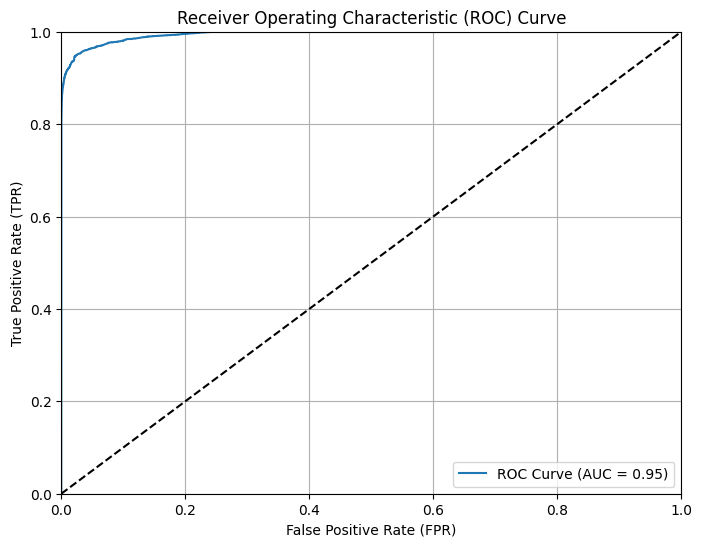

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset and preprocess as needed
dataset_path = "/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv"  # Provide the correct path to your dataset
df = pd.read_csv(dataset_path)

# Data Cleaning and Label Encoding (if necessary)
# You might need to perform tasks like handling missing values or removing duplicates if necessary.
# Also, encode categorical features if present.

# Example: Label encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Data Transformation
# Standardization of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert the 'label' column to binary categorical (0 or 1)
threshold = 0.5  # Adjust the threshold as needed
df['label'] = (df['label'] > threshold).astype(int)

# PCA Feature Extraction
n_components = 10  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols]))
df_pca.columns = [f"PCA_{i+1}" for i in range(n_components)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['label'], test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Project_Dataset/UNSW_NB15_testing-set.csv")

# Drop unnecessary columns (e.g., 'id', 'attack_cat')
data.drop(['id', 'attack_cat'], axis=1, inplace=True)

# Encode categorical features (if any)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split the dataset into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report for more detailed evaluation
print(classification_report(y_test, y_pred))


FileNotFoundError: ignored